# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import sklearn as skl
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
data_dir = './traffic-signs-data/'

training_file = data_dir + 'train.p'
validation_file = data_dir + 'valid.p'
testing_file = data_dir + 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train_raw, y_train = train['features'], train['labels']
X_valid_raw, y_valid = valid['features'], valid['labels']
X_test_raw,  y_test  = test['features'], test['labels']

In [3]:
# Let's take a look at what type of data we have...
%whos

Variable           Type              Data/Info
----------------------------------------------
X_test_raw         ndarray           12630x32x32x3: 38799360 elems, type `uint8`, 38799360 bytes (37.001953125 Mb)
X_train_raw        ndarray           34799x32x32x3: 106902528 elems, type `uint8`, 106902528 bytes (101.9501953125 Mb)
X_valid_raw        ndarray           4410x32x32x3: 13547520 elems, type `uint8`, 13547520 bytes (12.919921875 Mb)
data_dir           str               ./traffic-signs-data/
f                  BufferedReader    <_io.BufferedReader name=<...>affic-signs-data/test.p'>
np                 module            <module 'numpy' from '/Vo<...>kages/numpy/__init__.py'>
pickle             module            <module 'pickle' from '/V<...>lib/python3.5/pickle.py'>
skl                module            <module 'sklearn' from '/<...>ges/sklearn/__init__.py'>
test               dict              n=4
testing_file       str               ./traffic-signs-data/test.p
train              di

In [4]:
# Load the 'signnames.csv' file as well so we know meaning of each label...
import csv
reader = csv.reader(open('signnames.csv', 'r'))
next(reader) # skip 1st line

# load the data into a dict
signnames = {}
for row in reader:
    k, v = row
    signnames[k] = v

# print out the data
print('Label')
print(' #      Sign Names')
print('---------------------------')
for i in range(len(signnames)):
    print('{:2n}   {}'.format(i, signnames[str(i)]))

Label
 #      Sign Names
---------------------------
 0   Speed limit (20km/h)
 1   Speed limit (30km/h)
 2   Speed limit (50km/h)
 3   Speed limit (60km/h)
 4   Speed limit (70km/h)
 5   Speed limit (80km/h)
 6   End of speed limit (80km/h)
 7   Speed limit (100km/h)
 8   Speed limit (120km/h)
 9   No passing
10   No passing for vehicles over 3.5 metric tons
11   Right-of-way at the next intersection
12   Priority road
13   Yield
14   Stop
15   No vehicles
16   Vehicles over 3.5 metric tons prohibited
17   No entry
18   General caution
19   Dangerous curve to the left
20   Dangerous curve to the right
21   Double curve
22   Bumpy road
23   Slippery road
24   Road narrows on the right
25   Road work
26   Traffic signals
27   Pedestrians
28   Children crossing
29   Bicycles crossing
30   Beware of ice/snow
31   Wild animals crossing
32   End of all speed and passing limits
33   Turn right ahead
34   Turn left ahead
35   Ahead only
36   Go straight or right
37   Go straight or left
38   

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [5]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = y_train.size

# TODO: Number of testing examples.
n_test = y_test.size

# TODO: What's the shape of an traffic sign image?
image_shape = X_train_raw.shape[1:3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).size

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [6]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

In [7]:
# take a look at what all the labels are
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42], dtype=uint8)

In [8]:
# and how many unique ones are there
len(np.unique(y_train))

43

Let's see how what the distribution of the labels look like.
>Check for skewness. Note mentally for later, in case model has issues recognizing certain data...

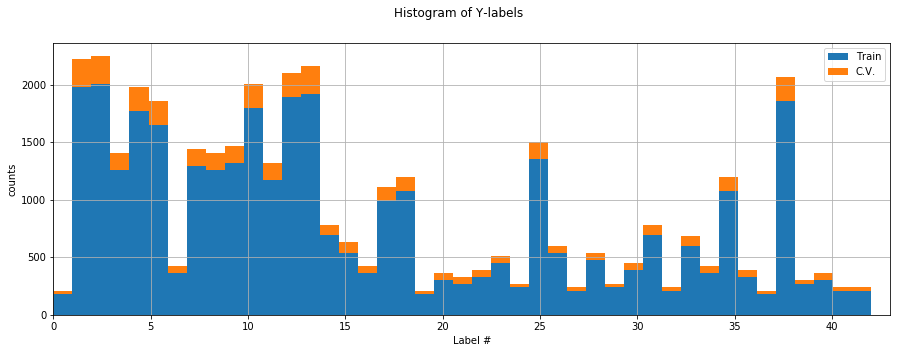

In [9]:
# Plot out histogram of the labels (training & Cross Validation)

fig = plt.figure(figsize=(15,5))
fig.suptitle('Histogram of Y-labels')
bin_count = n_classes

ax = fig.add_subplot(111)
ax.hist([y_train, y_valid], bins=bin_count, stacked='True')
plt.xlim(0, n_classes)
ax.set_xlabel('Label #')
ax.set_ylabel('counts')
ax.legend(['Train','C.V.'])
ax.grid()

Now let's plot out 10 random X data images, just to be sure they look like traffic signs.

In [10]:
import random as rnd

sample #1
label 35, "Ahead only"


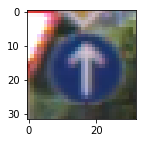

sample #2
label 1, "Speed limit (30km/h)"


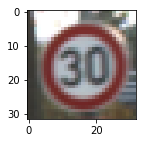

sample #3
label 5, "Speed limit (80km/h)"


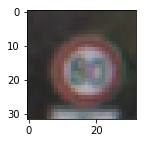

sample #4
label 42, "End of no passing by vehicles over 3.5 metric tons"


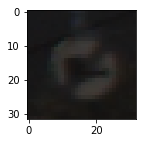

sample #5
label 1, "Speed limit (30km/h)"


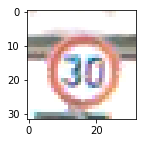

sample #6
label 1, "Speed limit (30km/h)"


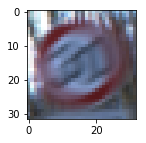

sample #7
label 10, "No passing for vehicles over 3.5 metric tons"


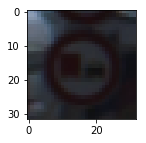

sample #8
label 28, "Children crossing"


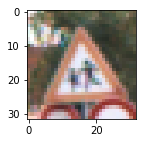

sample #9
label 31, "Wild animals crossing"


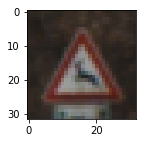

sample #10
label 13, "Yield"


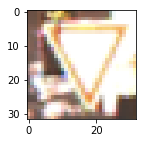

In [11]:
# plot out 10 random samples from traning set
num_samples = 10
sample_idx = [rnd.randint(0,n_train-1) for i in range(num_samples)]
for i in range(num_samples):
    print('sample #{}'.format(i+1))
    print('label {}, "{}"'.format(y_train[sample_idx[i]], signnames[str(y_train[sample_idx[i]])]))
    plt.figure(figsize=(2,2))
    plt.imshow(X_train_raw[sample_idx[i]])
    plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [12]:
import tensorflow as tf
import cv2

In [13]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

**Contrast normalization**

First, let's adjust the contrast of each image...

In [14]:
# normalize image contrast
# note - we are NOT normalizing across all the features at this step!

def cv2contrast_normalize(x_in):
    dst = np.zeros(x_in.shape) # setup destination matrix shape
    
    # Use list comprehension, adjust each image contrast to be between [0, 255]
    l = [cv2.normalize(x, dst, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U) for x in x_in]
    
    return np.asarray(l)

In [15]:
# apply to each data set
X_train_c = cv2contrast_normalize(X_train_raw)
X_valid_c = cv2contrast_normalize(X_valid_raw)
X_test_c  = cv2contrast_normalize(X_test_raw)

**Feature normalization**

Next, we'll apply feature normalization such that all the features have a mean ~0.0, and variation of ~1.0 &sigma;. This will aid the optimizer...

>**Note:** Only the normalization parameters (mean, std dev) from the **training_set** will be retained as part of the model, and be applied later on the **validation_set** and **testing_set**. As this is how the model would be used in the real world.

In [16]:
from sklearn.preprocessing import StandardScaler

norm_from_training = StandardScaler()

# fit the parameters to the training data, and output the transformed training data.
x_tmp = X_train_c.reshape(-1,(32*32*3)).astype('float32')
X_train = norm_from_training.fit_transform(x_tmp)
X_train = X_train.reshape(-1, 32, 32, 3)

# Use previously fitted parameters to transform validation & testing data
x_tmp = X_valid_c.reshape(-1,(32*32*3)).astype('float32')
X_valid = norm_from_training.transform(x_tmp)
X_valid = X_valid.reshape(-1, 32, 32, 3)

x_tmp = X_test_c.reshape(-1,(32*32*3)).astype('float32')
X_test = norm_from_training.transform(x_tmp)
X_test = X_test.reshape(-1, 32, 32, 3)

**Visualize data preprocessing**

LEFT = raw image, MIDDLE = re-contrast, RIGHT = feature normalized

sample #1
label 38, "Keep right"


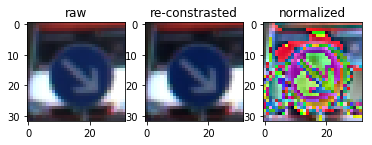

sample #2
label 31, "Wild animals crossing"


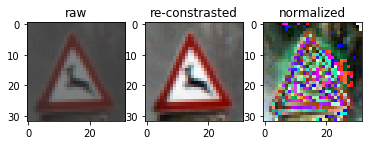

sample #3
label 16, "Vehicles over 3.5 metric tons prohibited"


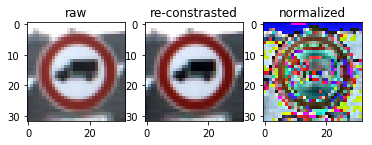

sample #4
label 28, "Children crossing"


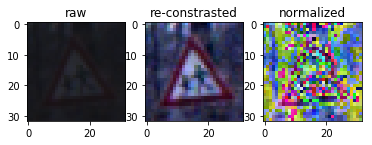

sample #5
label 4, "Speed limit (70km/h)"


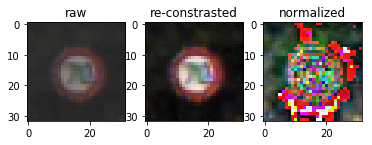

sample #6
label 35, "Ahead only"


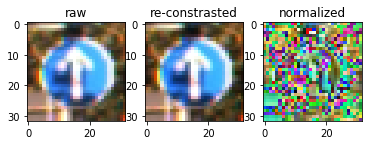

sample #7
label 38, "Keep right"


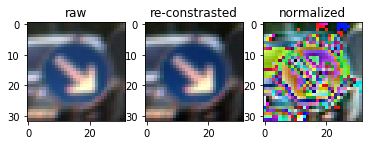

sample #8
label 35, "Ahead only"


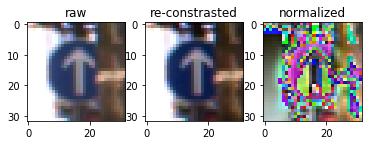

sample #9
label 3, "Speed limit (60km/h)"


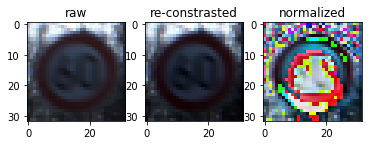

sample #10
label 4, "Speed limit (70km/h)"


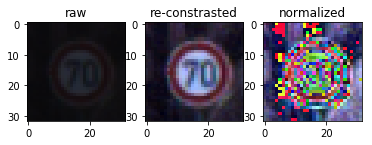

In [17]:
# plot out 10 random samples from traning set
num_samples = 10
sample_idx = [rnd.randint(0,n_train-1) for i in range(num_samples)]

print('LEFT = raw image, MIDDLE = re-contrast, RIGHT = feature normalized')
print()
for i in range(num_samples):
    print('sample #{}'.format(i+1))
    print('label {}, "{}"'.format(y_train[sample_idx[i]], signnames[str(y_train[sample_idx[i]])]))
    fig = plt.figure(figsize=(6,2))

    ax = fig.add_subplot(131)
    ax.imshow(X_train_raw[sample_idx[i]])
    ax.set_title('raw')
    
    ax = fig.add_subplot(132)
    ax.imshow(X_train_c[sample_idx[i]])
    ax.set_title('re-constrasted')

    ax = fig.add_subplot(133)
    ax.imshow(X_train[sample_idx[i]])
    ax.set_title('normalized')

    plt.show()

Wow! Images from Feature normalization look very weird to human eyes...

### Model Architecture

In [18]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [19]:
EPOCHS = 10
BATCH_SIZE = 128

Setup features and labels...

In [20]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

Set up training pipeline...

In [21]:
# learning rate
rate = 0.003 

# for the dropout layer
dropout_keep_prob = tf.placeholder(tf.float32)

Let's start with LeNet's architecture...
**BUT** we added in **dropout layer** before each activation layer

### Architecture
**Layer 1:**
>**Convolution** Input = 32x32x3. Filter = (5x5x3)x6. Output = 28x28x6.

>**Dropout**

>**Activation** ReLU

>**Pooling** Input = 28x28x6. Filter = 2x2. Output = 14x14x6.

**Layer 2:**
>**Convolution** Input = 14x14x6. Filter = (5x5x6)x16. Output = 10x10x16.

>**Dropout**

>**Activation** ReLU

>**Pooling** Input = 10x10x16. Filter = 2x2. Output = 5x5x16.

**Flatten.** Input = 5x5x16. Output = 400.

**Layer 3:**
>**Fully Connected** Input = 400. Output = 120.

>**Dropout**

>**Activation** ReLU

**Layer 4:**
>**Fully Connected** Input = 120. Output = 84.

>**Dropout**

>**Activation** ReLU

**Layer 5:**
>**Fully Connected (Logits)** Input = 84. Output = 43.



In [22]:
from tensorflow.contrib.layers import flatten

# Below is basic LeNet architecture with modification of added dropout...

# Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
mu = 0
sigma = 0.1

# Layer 1: Convolutional.
#          Input = 32x32x3. Filter = 5x5x3x6. Output = 28x28x6.
conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean=mu, stddev=sigma),
                      name='conv1_W')
conv1_b = tf.Variable(tf.zeros(6),
                      name='conv1_b')
conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

# Dropout.
conv1 = tf.nn.dropout(conv1, dropout_keep_prob)

# Activation.
conv1 = tf.nn.relu(conv1)

# Pooling.
#          Input = 28x28x6. Filter = 2x2. Output = 14x14x6.
conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

# Layer 2: Convolutional.
#          Input = 14x14x6. Filter = 5x5x6x16. Output = 10x10x16.
conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean=mu, stddev=sigma),
                      name='conv2_W')
conv2_b = tf.Variable(tf.zeros(16),
                      name='conv2_b')
conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

# Dropout.
conv2 = tf.nn.dropout(conv2, dropout_keep_prob)

# Activation.
conv2 = tf.nn.relu(conv2)

# Pooling.
#          Input = 10x10x16. Filter = 2x2. Output = 5x5x16.
conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

# Flatten.
#          Input = 5x5x16. Output = 400.
fc0   = flatten(conv2)

# Layer 3: Fully Connected.
#          Input = 400. Output = 120.
fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean=mu, stddev=sigma),
                    name='fc1_W')
fc1_b = tf.Variable(tf.zeros(120),
                    name='fc1_b')
fc1   = tf.matmul(fc0, fc1_W) + fc1_b

# Dropout.
fc1 = tf.nn.dropout(fc1, dropout_keep_prob)

# Activation.
fc1    = tf.nn.relu(fc1)

# Layer 4: Fully Connected.
#          Input = 120. Output = 84.
fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean=mu, stddev=sigma),
                     name='fc2_W')
fc2_b  = tf.Variable(tf.zeros(84),
                     name='fc2_b')
fc2    = tf.matmul(fc1, fc2_W) + fc2_b

# Dropout.
fc2 = tf.nn.dropout(fc2, dropout_keep_prob)

# Activation.
fc2    = tf.nn.relu(fc2)

# Layer 5: Fully Connected.
#          Input = 84. Output = 43.
fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean=mu, stddev=sigma),
                     name='fc3_W')
fc3_b  = tf.Variable(tf.zeros(43),
                     name='fc3_b')
logits = tf.matmul(fc2, fc3_W) + fc3_b


In [23]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)

optimizer = tf.train.AdamOptimizer(learning_rate = rate)

training_operation = optimizer.minimize(loss_operation)

Model eval...

In [24]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, dropout_keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [25]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [26]:
from sklearn.utils import shuffle

In [27]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, dropout_keep_prob: 0.75})
        
        training_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}, Validation Accuracy = {:.3f}".format(training_accuracy, validation_accuracy))
        
        saver.save(sess, './saved_models/lenet'+str(i+1))
        print("Model-"+str(i+1)+" saved")
        print()

Training...

EPOCH 1 ...
Training Accuracy = 0.906, Validation Accuracy = 0.845
Model-1 saved

EPOCH 2 ...
Training Accuracy = 0.957, Validation Accuracy = 0.908
Model-2 saved

EPOCH 3 ...
Training Accuracy = 0.967, Validation Accuracy = 0.917
Model-3 saved

EPOCH 4 ...
Training Accuracy = 0.982, Validation Accuracy = 0.934
Model-4 saved

EPOCH 5 ...
Training Accuracy = 0.983, Validation Accuracy = 0.933
Model-5 saved

EPOCH 6 ...
Training Accuracy = 0.982, Validation Accuracy = 0.940
Model-6 saved

EPOCH 7 ...
Training Accuracy = 0.988, Validation Accuracy = 0.938
Model-7 saved

EPOCH 8 ...
Training Accuracy = 0.989, Validation Accuracy = 0.940
Model-8 saved

EPOCH 9 ...
Training Accuracy = 0.978, Validation Accuracy = 0.935
Model-9 saved

EPOCH 10 ...
Training Accuracy = 0.983, Validation Accuracy = 0.938
Model-10 saved



Run the model against the test set

In [28]:
with tf.Session() as sess:
    saver.restore(sess, './saved_models/lenet9')
    testing_accuracy = evaluate(X_test, y_test)
    print("Testing Accuracy = {:.3f}".format(testing_accuracy))
    print()

Testing Accuracy = 0.911



---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

**Note**: I went out and found 30 images (instead of 5). Becuase I'm curious how the model will perform (on false positive and/or false negatives). :)

The images were extracted from this online image search result url:

[https://s-media-cache-ak0.pinimg.com/originals/ce/55/f8/ce55f8319078dab5dbc37c51a77a837f.jpg](https://s-media-cache-ak0.pinimg.com/originals/ce/55/f8/ce55f8319078dab5dbc37c51a77a837f.jpg)

Which is shown below:

![image from web](./test_data_from_web/web_sample_1.png)

In [29]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

In [30]:
from PIL import Image

img_dir = './test_data_from_web/'

X_test_new = np.array([], dtype='uint8').reshape(0, 32, 32, 3)
for i in range(30):
    filename = img_dir+'sample_{:02d}.jpg'.format(i+1)
    img = Image.open(filename).resize((32,32)) # open and resize RGB image to 32x32
    img = np.array(img).reshape(1, 32, 32, 3)
    X_test_new = np.concatenate((X_test_new, img), axis=0)

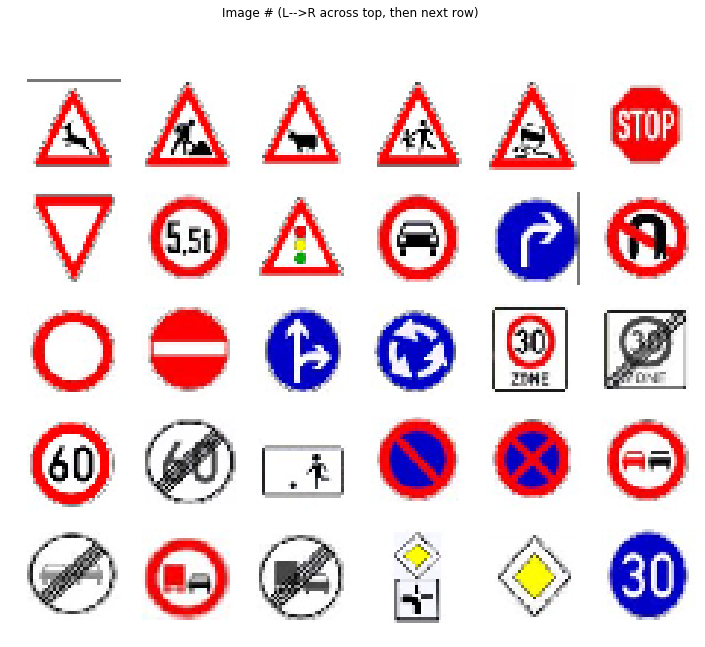

In [31]:
# plot out the 30 selected images (L->R across the top, then next row)
n_samples = X_test_new.shape[0]

fig = plt.figure(figsize=(12,10))
fig.suptitle('Image # (L-->R across top, then next row)')
for i in range(n_samples):
    fig.add_subplot(5,6,(i+1))
    plt.imshow(X_test_new[i])
    plt.axis('off')
plt.show()

Now we need to manually generate the labels

>**Note:** A (-1) denote a label that does NOT exist within the original 43 label definitions.

In [32]:
# answer key! Note: (-1) denote data that the model has never seen before...

y_test_new = np.array(
    [31, # img0, Wild animals crossing
     25, # img1, Road work
     -1, # img2, NOT IN TRAINING SET
     28, # img3, Children crossing
     23, # img4, Slippery road
     14, # img5, Stop
     
     13, # img6, Yield
     -1, # img7, NOT IN TRAINING SET
     26, # img8, Traffic signals
     -1, # img9, NOT IN TRAINING SET
     33, # img10, Turn right ahead
     -1, # img11, NOT IN TRAINING SET

     15, # img12, No vehicles
     17, # img13, No entry
     36, # img14, Go straight or right
     40, # img15, Roundabout mandatory
      1, # img16, Speed limit (30km/h)
      6, # img17, End of speed limit (80km/h)

      3, # img18, Speed limit (60km/h)
      6, # img19, End of speed limit (80km/h)
     -1, # img20, NOT IN TRAINING SET
     -1, # img21, NOT IN TRAINING SET
     -1, # img22, NOT IN TRAINING SET
      9, # img23, No passing
     
     41, # img24, End of no passing
     10, # img25, No passing for vehicles over 3.5 metric tons
     42, # img26, End of no passing by vehicles over 3.5 metric tons
     12, # img27, Priority road
     12, # img28, Priority road
     -1])# img29, NOT IN TRAINING SET

### Predict the Sign Type for Each Image

In [33]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

Pre-process the web searched test data...

In [34]:
# pre-process using the norm_from_training from earlier...
x_tmp = X_test_new.reshape(-1,(32*32*3)).astype('float32')
X_test_new_pp = norm_from_training.transform(x_tmp).reshape(-1, 32, 32, 3)

Run the TensorFlow session to predict these new traffic signs

In [35]:
predict_prob = tf.nn.softmax(logits)

with tf.Session() as sess:
    saver.restore(sess, './saved_models/lenet9')
    prob = sess.run(predict_prob, feed_dict={x: X_test_new_pp, dropout_keep_prob: 1.0})


Now let's take a look at the results...

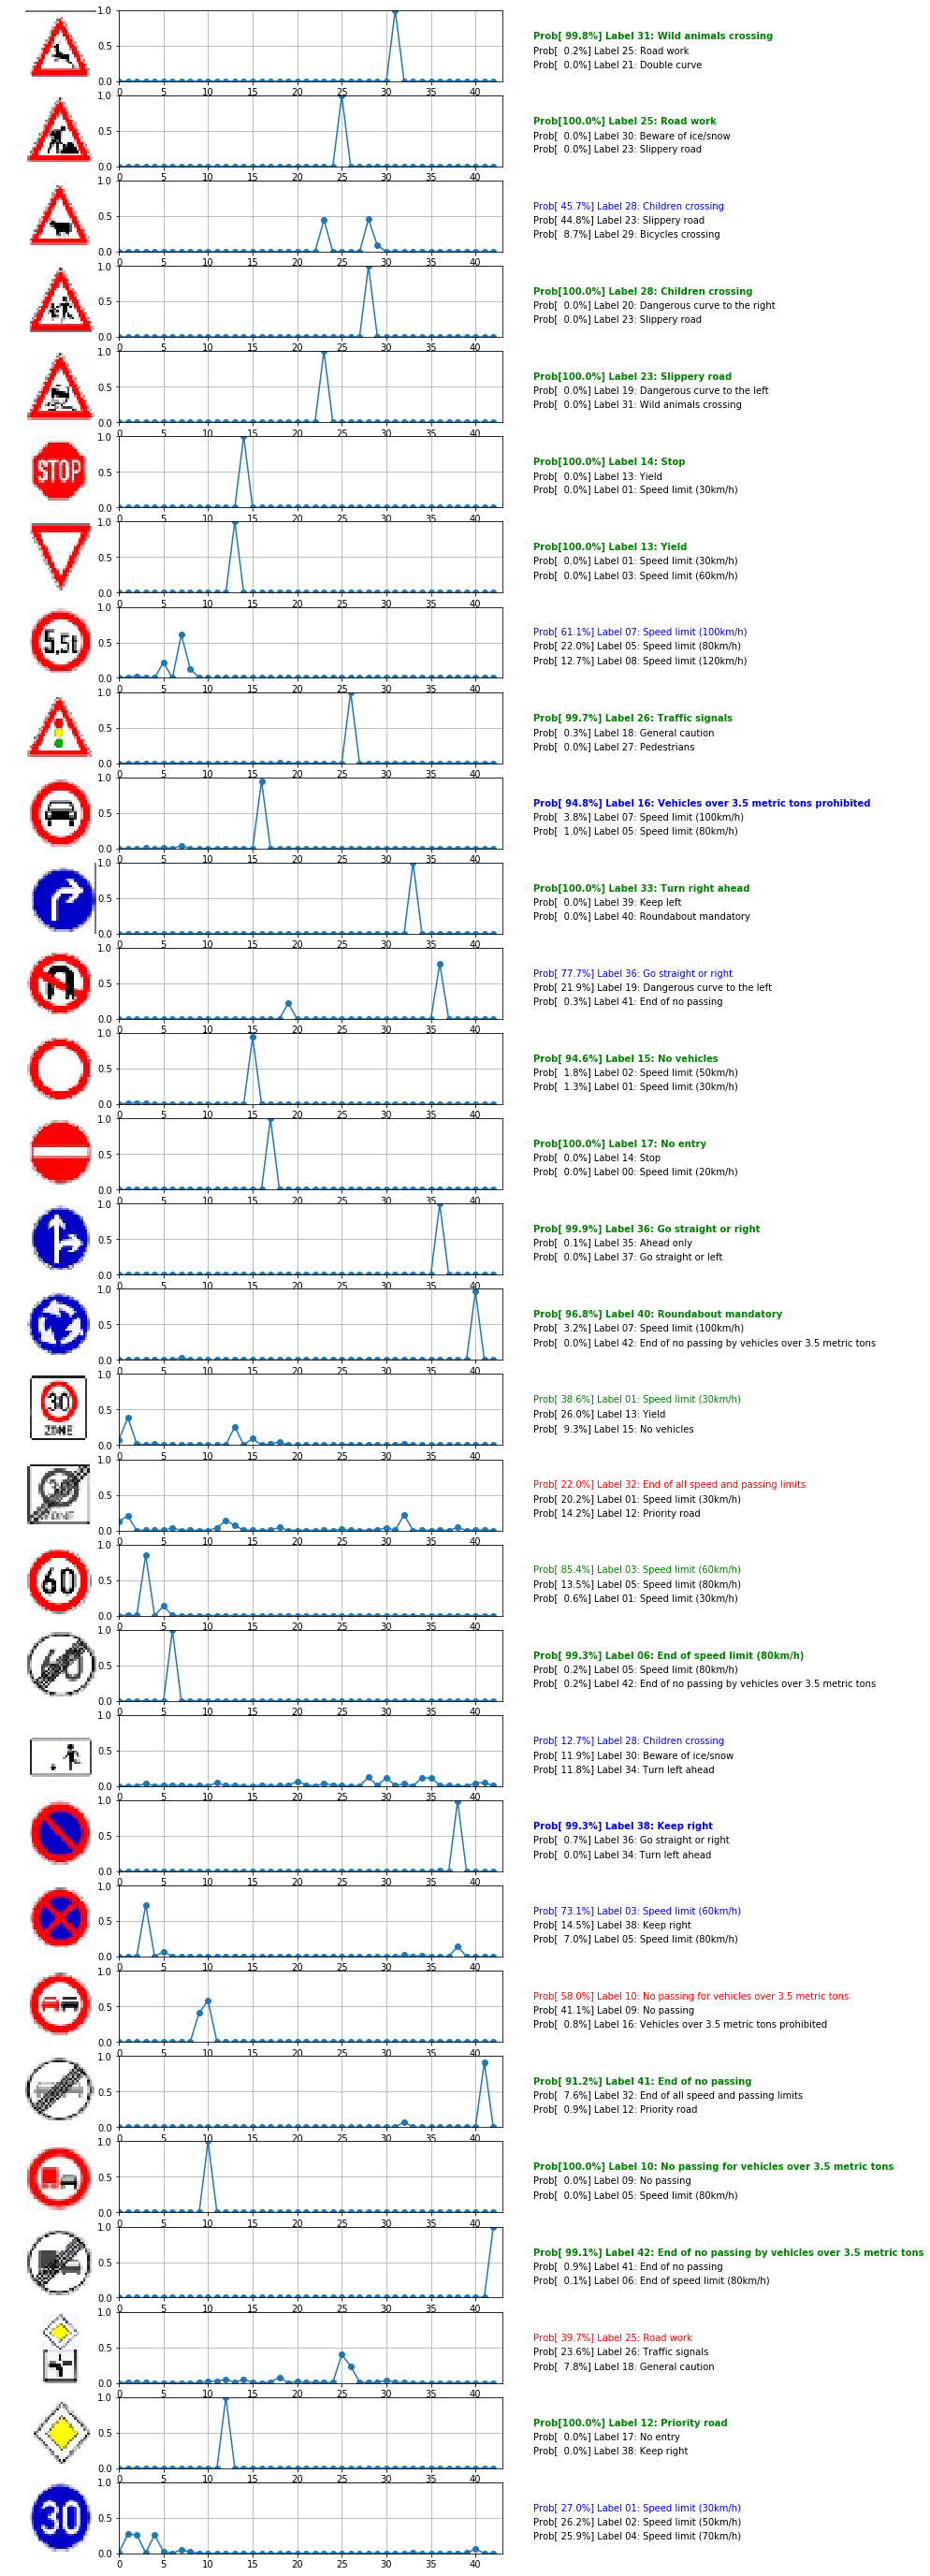

In [36]:
import matplotlib.gridspec as gridspec

# setup subplot gridspec
fig = plt.figure(figsize=(15,50))
n_samples = len(prob)
gs = gridspec.GridSpec(n_samples,8) # rows x columns

for i in range(n_samples):
    # show the image...
    ax = plt.subplot(gs[i,0]) # on the far left grid column
    ax.imshow(X_test_new[i])
    ax.set_axis_off()

    # plot out the softmax probabilities...
    ax = plt.subplot(gs[i,1:5]) # on grid columns 2-5
    ax.plot(prob[i],'o-')
    plt.xlim((0,n_classes))
    ax.xaxis.set_ticks(range(0,n_classes,10),minor=True)
    plt.ylim((0,1))
    plt.grid()

    # write out top 3 predictions...
    ax = plt.subplot(gs[i,5:8]) # on grid columns 6-8
    top3 = prob[i].argsort()[::-1][0:3]

    # use BOLD if confidence > 90%
    if (prob[i][top3[0]]>0.90):
        fntwgt = 'bold'
    else:
        fntwgt = 'normal'
    
    # color code based on prediction correctness
    if (y_test_new[i]==-1):
        fntcolor = 'blue' # BLUE == undefined in training set
    elif (top3[0]==y_test_new[i]):
        fntcolor = 'green' # GREEN == predicted correctly
    else:
        fntcolor = 'red'   # RED == predicted incorrectly
    
    ax.text(0.05, 0.6, 'Prob[{:5.1f}%] Label {:02d}: {}'.format(100*prob[i][top3[0]],
                                                                top3[0],
                                                                signnames[str(top3[0])]),
            fontweight=fntwgt, color=fntcolor)
    ax.text(0.05, 0.4, 'Prob[{:5.1f}%] Label {:02d}: {}'.format(100*prob[i][top3[1]],
                                                                top3[1],
                                                                signnames[str(top3[1])]))
    ax.text(0.05, 0.2, 'Prob[{:5.1f}%] Label {:02d}: {}'.format(100*prob[i][top3[2]],
                                                                top3[2],
                                                                signnames[str(top3[2])]))
    ax.axes.set_axis_off()

plt.show()

**Note:**
>For each traffic sign above, the plot shows the probability (y-axis) that it belong to 1 of the labels (x-axis). The top 3 probable labels are written out on the right of each plot, with their associated probability.

>**Bold** text are when probability > 90%.

>**BLUE** color = ground truth label is NOT part of the training set labels. (Yes, this was unfair to the model :-) )

>**GREEN** color = correct prediction

>**RED** color = erroneous prediction



### Analyze Performance

In [37]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

In [38]:
predict = prob.argmax(axis=1)
correct_predict = np.equal(predict, y_test_new).astype('float32')
accuracy = correct_predict.mean()

print('Correctly predicted {} out of {} total.'.format(correct_predict.sum(), correct_predict.size))
print('Accuracy = {:5.1f}%'.format(accuracy*100))

Correctly predicted 19.0 out of 30 total.
Accuracy =  63.3%


>**NOTE:** We included in the web images 8 examples that contains labels the model did not train for. Thus to accurately assess, we should exclude those. That leaves us with 22 samples.

> Of these 22 samples, 3 were predicted incorrectly. Thus yields an accuracy of: 19/22 = **86.4%**

> Of the mistakes, they were all very tricky signs that were picked intentionally.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [39]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

>Ha, I just did pretty much exactly this in my previous plot analysis above!

>Ok, let me try the TF method...

In [40]:
with tf.Session() as sess:
    top_k = sess.run(tf.nn.top_k(prob, k=3))

In [41]:
top_k

TopKV2(values=array([[  9.98268127e-01,   1.59126730e-03,   1.40106669e-04],
       [  1.00000000e+00,   2.22715735e-11,   9.60063141e-16],
       [  4.56516862e-01,   4.47679788e-01,   8.73446986e-02],
       [  9.99999881e-01,   5.17054595e-08,   3.61184043e-08],
       [  9.99865770e-01,   1.33875816e-04,   3.56322033e-07],
       [  9.99999762e-01,   2.71358857e-07,   1.30533706e-09],
       [  1.00000000e+00,   1.91785233e-17,   3.79066269e-18],
       [  6.10584021e-01,   2.20348597e-01,   1.26561806e-01],
       [  9.96987402e-01,   3.01212701e-03,   4.72301281e-07],
       [  9.47938144e-01,   3.79075631e-02,   1.04854107e-02],
       [  1.00000000e+00,   6.35784003e-09,   3.24685057e-10],
       [  7.76889205e-01,   2.18689695e-01,   2.52556917e-03],
       [  9.45899665e-01,   1.80505421e-02,   1.32044181e-02],
       [  9.99998093e-01,   1.90678202e-06,   6.46929132e-09],
       [  9.99337494e-01,   5.77859697e-04,   3.59086516e-05],
       [  9.68480051e-01,   3.15166190e-0

Thus the top predicted labels, with their associated probability of certainties...

In [42]:
# print out, for each sample, top predicted label # and associated probability

top_label = top_k.indices[:,0]
top_label = top_label.reshape(-1,1) # reshape from np row array -> column vector

top_value = top_k.values[:,0]
top_value = top_value.reshape(-1,1) # reshape from np row array -> column vector

print('        Predicted\n  label          probability')
print(np.concatenate( (top_label, top_value), axis=1))

        Predicted
  label          probability
[[ 31.           0.99826813]
 [ 25.           1.        ]
 [ 28.           0.45651686]
 [ 28.           0.99999988]
 [ 23.           0.99986577]
 [ 14.           0.99999976]
 [ 13.           1.        ]
 [  7.           0.61058402]
 [ 26.           0.9969874 ]
 [ 16.           0.94793814]
 [ 33.           1.        ]
 [ 36.           0.7768892 ]
 [ 15.           0.94589967]
 [ 17.           0.99999809]
 [ 36.           0.99933749]
 [ 40.           0.96848005]
 [  1.           0.38637653]
 [ 32.           0.22026841]
 [  3.           0.85411406]
 [  6.           0.99328351]
 [ 28.           0.12656645]
 [ 38.           0.99286216]
 [  3.           0.73068446]
 [ 10.           0.58002901]
 [ 41.           0.91192806]
 [ 10.           0.99999988]
 [ 42.           0.99072391]
 [ 25.           0.39704868]
 [ 12.           1.        ]
 [  1.           0.27006176]]


---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [43]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input, dropout_keep_prob: 1.0})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [44]:
def viz_test(idx):
    X_viz_test = X_test_new_pp[idx]

    print('Image index = {}'.format(idx))
    print('Orig image')
    plt.figure(figsize=(1.7, 1.7))
    plt.imshow(X_test_new[idx])
    plt.show()

    print('Pre-processed image')
    plt.figure(figsize=(1.7, 1.7))
    plt.imshow(X_viz_test)
    plt.show()

    sess = tf.get_default_session()
    saver.restore(sess, './saved_models/lenet9')
    print('Layer = conv1 {}'.format(conv1.get_shape().as_list()[1:]))
    outputFeatureMap(X_viz_test.reshape(-1,32,32,3), conv1)
    plt.show()

    print('Layer = conv2 {}'.format(conv2.get_shape().as_list()[1:]))
    outputFeatureMap(X_viz_test.reshape(-1,32,32,3), conv2)
    plt.show()

Image index = 25
Orig image


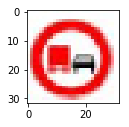

Pre-processed image


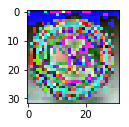

Layer = conv1 [14, 14, 6]


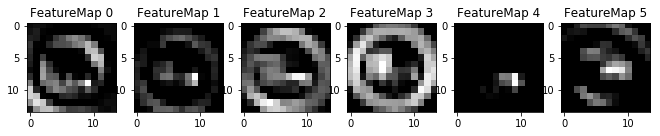

Layer = conv2 [5, 5, 16]


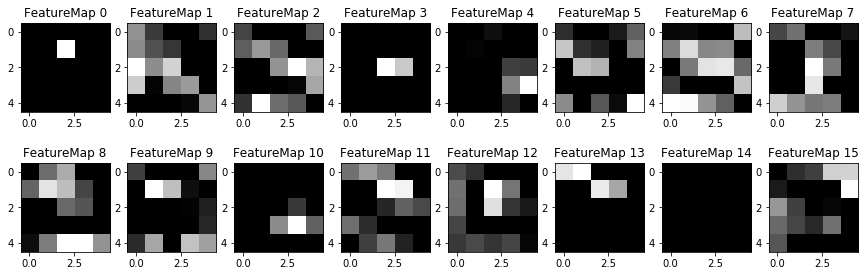

In [45]:
with tf.Session() as sess:
    viz_test(25)

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

From the above, the feature maps for the 2 convolution layers are shown. Conv1 has 6 feature maps, while conv2 has 16. The chosen original image (index 8, label 26, "Traffic signals") is displayed, along with feature normalized image.

It's visible in feature maps of `conv1` layer, that it is starting to pick out characteristics of the sign. The triangular shape is appearing to be recognized.

Beyond that, `conv2` layer and beyond are much more difficult to interpret the NN's 'cognitive process'...

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 